In [1]:
# Must run another "shift enter" run to complete the imports
# Science imports
import pandas as pd
import numpy as np

# Viz imports
import matplotlib.pyplot as plt
import seaborn as sns

# Config matplotlib
%matplotlib inline
plt.rcParams["patch.force_edgecolor"] = True # in matplotlib, edge borders are turned off by default.
sns.set_style("darkgrid") # set a grey grid as a background

# ML imports
import sklearn
from sklearn import metrics
# Linear Regression
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
# Logistic Regression
#
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

# turn off warnings
import warnings
warnings.filterwarnings('ignore')


In [9]:
data = pd.read_csv('COVID19_open_line_list.csv')

In [10]:
data.head(3)

,ID,age,sex,city,province,country,wuhan(0)_not_wuhan(1),latitude,longitude,geo_resolution,...,Unnamed: 35,Unnamed: 36,Unnamed: 37,Unnamed: 38,Unnamed: 39,Unnamed: 40,Unnamed: 41,Unnamed: 42,Unnamed: 43,Unnamed: 44
0,1.0,30,male,"Chaohu City, Hefei City",Anhui,China,1.0,31.646960,117.716600,admin3,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2.0,47,male,"Baohe District, Hefei City",Anhui,China,1.0,31.778630,117.331900,admin3,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3.0,49,male,"High-Tech Zone, Hefei City",Anhui,China,1.0,31.828313,117.224844,point,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [11]:
data.drop(['Unnamed: '+str(x) for x in range(33,45)],axis=1,inplace=True) #deletes unnecessary columns

In [12]:
data.head(3)

,ID,age,sex,city,province,country,wuhan(0)_not_wuhan(1),latitude,longitude,geo_resolution,...,outcome,date_death_or_discharge,notes_for_discussion,location,admin3,admin2,admin1,country_new,admin_id,data_moderator_initials
0,1.0,30,male,"Chaohu City, Hefei City",Anhui,China,1.0,31.646960,117.716600,admin3,...,NaN,NaN,NaN,NaN,Chaohu City,Hefei City,Anhui,China,340181,NaN
1,2.0,47,male,"Baohe District, Hefei City",Anhui,China,1.0,31.778630,117.331900,admin3,...,NaN,NaN,NaN,NaN,Baohe District,Hefei City,Anhui,China,340111,NaN
2,3.0,49,male,"High-Tech Zone, Hefei City",Anhui,China,1.0,31.828313,117.224844,point,...,NaN,NaN,NaN,High-Tech Zone,Shushan District,Hefei City,Anhui,China,340104,NaN


In [63]:
data['outcome'].nunique()

12

In [67]:
data['outcome'].dropna().unique()

array(['discharged', 'discharge', 'died', 'Discharged', '05.02.2020',
       'death',
       'Symptoms only improved with cough. Currently hospitalized for follow-up.',
       'recovered', 'stable',
       'critical condition, intubated as of 14.02.2020',
       'treated in an intensive care unit (14.02.2020)', 'severe'],
      dtype=object)

In [61]:
data[data['outcome'].apply(clean)=='death']['age'].apply(apply_int).dropna()

185      39.0
1426     82.0
4800     44.0
5050     73.0
11219    77.0
11220    78.0
11222    68.0
11800    60.0
Name: age, dtype: float64

In [70]:
data[data['outcome'].apply(clean)=='recovered']['age'].apply(apply_int).dropna().mean()

45.0

In [19]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14126 entries, 0 to 14125
Data columns (total 33 columns):
ID                          13173 non-null float64
age                         1349 non-null object
sex                         1264 non-null object
city                        10194 non-null object
province                    12906 non-null object
country                     13148 non-null object
wuhan(0)_not_wuhan(1)       13170 non-null float64
latitude                    13147 non-null float64
longitude                   13147 non-null float64
geo_resolution              13147 non-null object
date_onset_symptoms         746 non-null object
date_admission_hospital     730 non-null object
date_confirmation           13089 non-null object
symptoms                    493 non-null object
lives_in_Wuhan              565 non-null object
travel_history_dates        503 non-null object
travel_history_location     758 non-null object
reported_market_exposure    35 non-null object
addi

In [21]:
data['outcome'].unique()

array([nan, 'discharged', 'discharge', 'died', 'Discharged', '05.02.2020',
       'death',
       'Symptoms only improved with cough. Currently hospitalized for follow-up.',
       'recovered', 'stable',
       'critical condition, intubated as of 14.02.2020',
       'treated in an intensive care unit (14.02.2020)', 'severe'],
      dtype=object)

In [22]:
def clean(x):
    if x == 'death' or x == 'died' or x == 'Death':
        return 'death'
    elif x == 'discharged' or x=='discharge':
        return 'discharge'
    elif x == 'recovered' or x=='stable':
        return 'recovered'
    else:
        return np.nan

In [23]:
def apply_int(x):
    try:
        y = int(x)
        return y
    except:
        return np.nan

In [38]:
deathAge=data[data['outcome'].apply(clean)=='death']['age'].apply(apply_int).dropna()

In [43]:
outcomeDischarge = data[data['outcome'].apply(clean)=='discharge']['age'].apply(apply_int).dropna()


In [44]:
outcomeRecovered = data[data['outcome'].apply(clean)=='recovered']['age'].apply(apply_int).dropna()


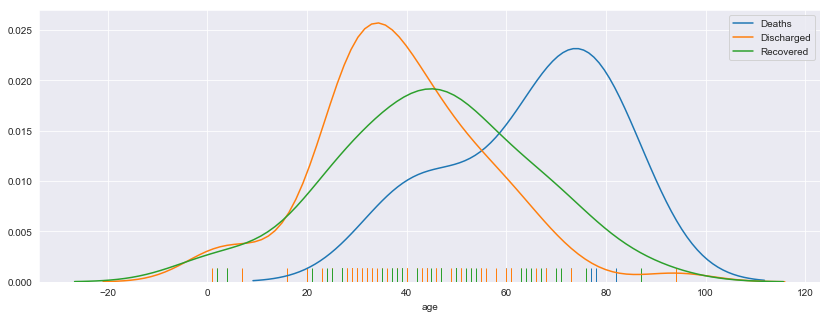

In [52]:

plt.figure(figsize=(14,5))

#sns.distplot(data[data['outcome'].apply(clean)=='death']['age'].apply(apply_int),hist=False,rug=True,label='Deaths')
sns.distplot(deathAge,hist=False,rug=True,label='Deaths')
#sns.distplot(data[data['outcome'].apply(clean)=='discharge']['age'].apply(apply_int),hist=False,rug=True,label='Discharged')
sns.distplot(outcomeDischarge,hist=False,rug=True,label='Discharged')
#sns.distplot(data[data['outcome'].apply(clean)=='recovered']['age'].apply(apply_int),hist=False,rug=True,label='Recovered')
sns.distplot(outcomeRecovered,hist=False,rug=True,label='Recovered')
plt.legend()
plt.show()

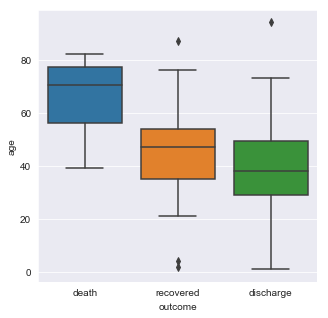

In [53]:
df1 = pd.DataFrame(data[data['outcome'].apply(clean)=='death']['age'].apply(apply_int)).assign(outcome='death')
df3 = pd.DataFrame(data[data['outcome'].apply(clean)=='discharge']['age'].apply(apply_int)).assign(outcome='discharge')
df2 = pd.DataFrame(data[data['outcome'].apply(clean)=='recovered']['age'].apply(apply_int)).assign(outcome='recovered')
cdf = pd.concat([df1, df2, df3])
plt.figure(figsize=(5,5))
sns.boxplot(x="outcome", y="age", data=cdf)  # RUN PLOT   
plt.show()

In [62]:
data[data['outcome'].apply(clean)=='death']['age'].apply(apply_int) .mean()

65.125

In [115]:
data[data['outcome'].apply(clean)=='discharge']['age'].apply(apply_int).mean()

39.046875

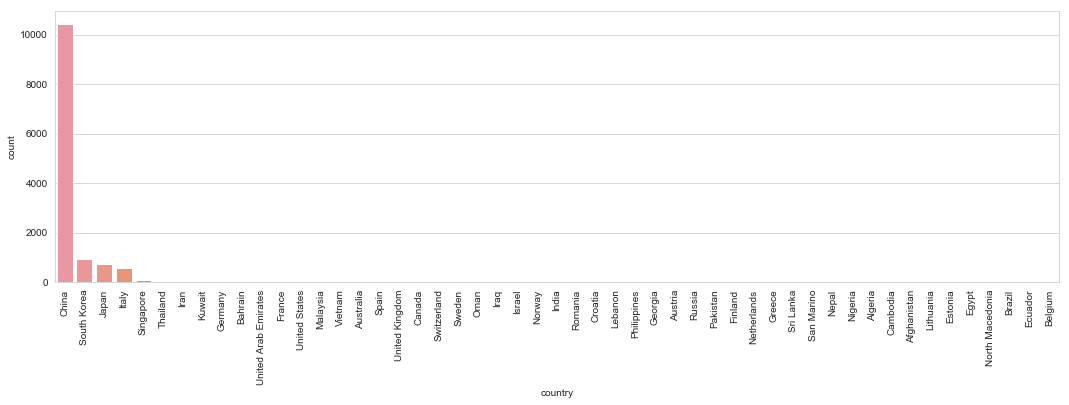

In [68]:
fig = plt.figure(figsize=(18,5))
sns.set_style('whitegrid')
sns.countplot(data['country'],order=data['country'].value_counts().index)
plt.xticks(rotation=90)
plt.show()

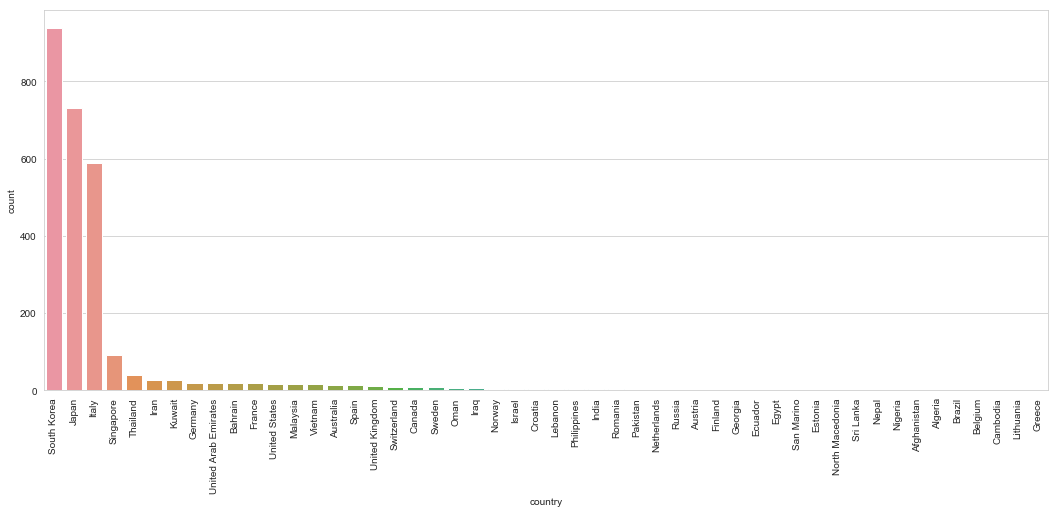

In [71]:
fig = plt.figure(figsize=(18,7))
sns.set_style('whitegrid')
sns.countplot(data[data['country'] != 'China']['country'],order=data[data['country'] != 'China']['country'].value_counts().index)
plt.xticks(rotation=90)
plt.show()

Text(0.5, 0, 'country')

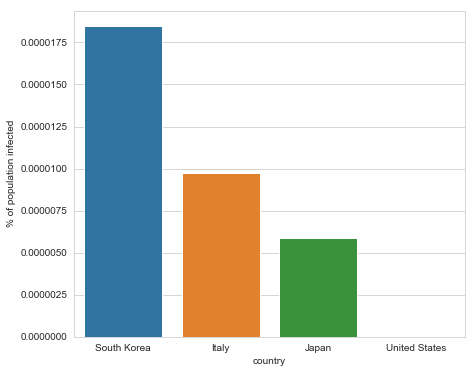

In [72]:
plt.figure(figsize=(7,6))
sns.barplot(x=['South Korea','Italy','Japan','United States'],
        
y=[938/50_800_000,588/60_430_000,731/124_800_000,17/327_170_000])
plt.ylabel("% of population infected")
plt.xlabel("country")

In [74]:
data10 = pd.read_csv('time_series_covid_19_confirmed.csv')

In [77]:
data10.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,3/5/20,3/6/20,3/7/20,3/8/20,3/9/20,3/10/20,3/11/20,3/12/20,3/13/20,3/14/20
0,NaN,Thailand,15.0000,101.0000,2,3,5,7,8,8,...,47,48,50,50,50,53,59,70,75,82
1,NaN,Japan,36.0000,138.0000,2,1,2,2,4,4,...,360,420,461,502,511,581,639,639,701,773
2,NaN,Singapore,1.2833,103.8333,0,1,3,3,4,5,...,117,130,138,150,150,160,178,178,200,212
3,NaN,Nepal,28.1667,84.2500,0,0,0,1,1,1,...,1,1,1,1,1,1,1,1,1,1
4,NaN,Malaysia,2.5000,112.5000,0,0,0,3,4,4,...,50,83,93,99,117,129,149,149,197,238


In [90]:
data10['Province/State'].unique()

array([nan, 'British Columbia', 'New South Wales', 'Victoria',
       'Queensland', 'South Australia', 'From Diamond Princess',
       'Western Australia', 'Tasmania', 'Northern Territory', 'Ontario',
       'Alberta', 'Quebec', 'Washington', 'New York', 'California',
       'Massachusetts', 'Diamond Princess', 'Grand Princess', 'Georgia',
       'Colorado', 'Florida', 'New Jersey', 'Oregon', 'Texas', 'Illinois',
       'Pennsylvania', 'Iowa', 'Maryland', 'North Carolina',
       'South Carolina', 'Tennessee', 'Virginia', 'Arizona', 'Indiana',
       'Kentucky', 'District of Columbia', 'Nevada', 'New Hampshire',
       'Minnesota', 'Nebraska', 'Ohio', 'Rhode Island', 'Wisconsin',
       'Connecticut', 'Hawaii', 'Oklahoma', 'Utah', 'Kansas', 'Louisiana',
       'Missouri', 'Vermont', 'Alaska', 'Arkansas', 'Delaware', 'Idaho',
       'Maine', 'Michigan', 'Mississippi', 'Montana', 'New Mexico',
       'North Dakota', 'South Dakota', 'West Virginia', 'Wyoming',
       'Hubei', 'France', 'G

In [109]:
data10[data10['Province/State'] == 'Diamond Princess'].head(1)

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,3/5/20,3/6/20,3/7/20,3/8/20,3/9/20,3/10/20,3/11/20,3/12/20,3/13/20,3/14/20
104,Diamond Princess,US,35.4437,139.638,0,0,0,0,0,0,...,45,45,45,45,45,46,46,46,46,46


In [78]:
data10.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 442 entries, 0 to 441
Data columns (total 57 columns):
Province/State    307 non-null object
Country/Region    442 non-null object
Lat               442 non-null float64
Long              442 non-null float64
1/22/20           442 non-null int64
1/23/20           442 non-null int64
1/24/20           442 non-null int64
1/25/20           442 non-null int64
1/26/20           442 non-null int64
1/27/20           442 non-null int64
1/28/20           442 non-null int64
1/29/20           442 non-null int64
1/30/20           442 non-null int64
1/31/20           442 non-null int64
2/1/20            442 non-null int64
2/2/20            442 non-null int64
2/3/20            442 non-null int64
2/4/20            442 non-null int64
2/5/20            442 non-null int64
2/6/20            442 non-null int64
2/7/20            442 non-null int64
2/8/20            442 non-null int64
2/9/20            442 non-null int64
2/10/20           442 non-null int64
2

In [87]:
data10[data10['Country/Region'] =='China']

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,3/5/20,3/6/20,3/7/20,3/8/20,3/9/20,3/10/20,3/11/20,3/12/20,3/13/20,3/14/20
156,Hubei,China,30.9756,112.2707,444,444,549,761,1058,1423,...,67466,67592,67666,67707,67743,67760,67773,67781,67786,67790
160,Guangdong,China,23.3417,113.4244,26,32,53,78,111,151,...,1351,1352,1352,1352,1352,1353,1356,1356,1356,1356
161,Henan,China,33.8820,113.6140,5,5,9,32,83,128,...,1272,1272,1272,1272,1272,1272,1273,1273,1273,1273
162,Zhejiang,China,29.1832,120.0934,10,27,43,62,104,128,...,1215,1215,1215,1215,1215,1215,1215,1215,1215,1227
163,Hunan,China,27.6104,111.7088,4,9,24,43,69,100,...,1018,1018,1018,1018,1018,1018,1018,1018,1018,1018
164,Anhui,China,31.8257,117.2264,1,9,15,39,60,70,...,990,990,990,990,990,990,990,990,990,990
165,Jiangxi,China,27.6140,115.7221,2,7,18,18,36,72,...,935,935,935,935,935,935,935,935,935,935
166,Shandong,China,36.3427,118.1498,2,6,15,27,46,75,...,758,758,758,758,758,758,760,760,760,760
168,Jiangsu,China,32.9711,119.4550,1,5,9,18,33,47,...,631,631,631,631,631,631,631,631,631,631
169,Chongqing,China,30.0572,107.8740,6,9,27,57,75,110,...,576,576,576,576,576,576,576,576,576,576


In [86]:
data10[data10['Country/Region']=='Thailand'].sum()

Province/State           0
Country/Region    Thailand
Lat                     15
Long                   101
1/22/20                  2
1/23/20                  3
1/24/20                  5
1/25/20                  7
1/26/20                  8
1/27/20                  8
1/28/20                 14
1/29/20                 14
1/30/20                 14
1/31/20                 19
2/1/20                  19
2/2/20                  19
2/3/20                  19
2/4/20                  25
2/5/20                  25
2/6/20                  25
2/7/20                  25
2/8/20                  32
2/9/20                  32
2/10/20                 32
2/11/20                 33
2/12/20                 33
2/13/20                 33
2/14/20                 33
2/15/20                 33
2/16/20                 34
2/17/20                 35
2/18/20                 35
2/19/20                 35
2/20/20                 35
2/21/20                 35
2/22/20                 35
2/23/20                 35
2

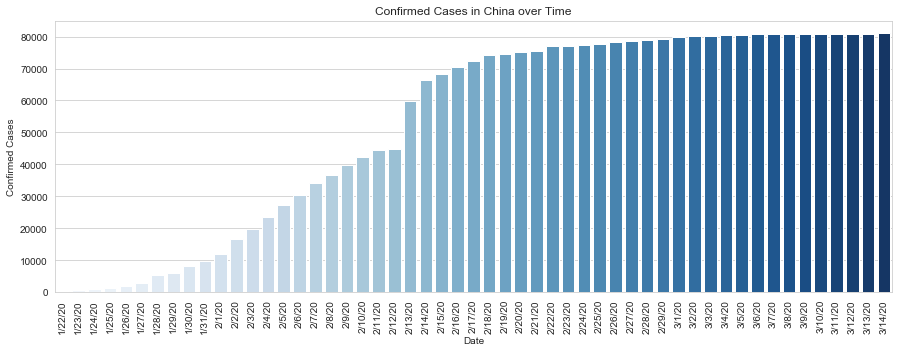

In [89]:
plot_data = data10[data10['Country/Region']=='China'].sum().drop(['Province/State','Country/Region','Lat','Long'])
plt.figure(figsize=(15,5))
sns.barplot(plot_data.index,plot_data,palette='Blues')
plt.xticks(rotation=90)
plt.xlabel("Date")
plt.ylabel("Confirmed Cases")
plt.title("Confirmed Cases in China over Time")
plt.show()

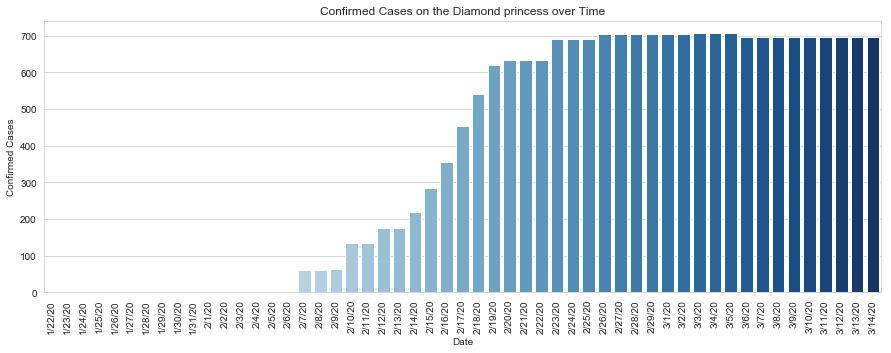

In [113]:
plot_data2 = data10[data10['Province/State']=='Diamond Princess'].tail(1).sum().drop(['Province/State','Country/Region','Lat','Long'])
plt.figure(figsize=(15,5))
sns.barplot(plot_data2.index,plot_data2,palette='Blues')
plt.xticks(rotation=90)
plt.xlabel("Date")
plt.ylabel("Confirmed Cases")
plt.title("Confirmed Cases on the Diamond princess over Time")
plt.show()